In [9]:
import pandas as pd

# L soad the CSV file to check its contents and structure
data_path = 'Data_final.csv'
data = pd.read_csv(data_path)

# Display the first few rows and the summary of the dataset
data_head = data.head()
data_info = data.info()
data_description = data.describe()

data_head, data_info, data_description

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105 entries, 0 to 104
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   O_score              105 non-null    float64
 1   C_score              105 non-null    float64
 2   E_score              105 non-null    float64
 3   A_score              105 non-null    float64
 4   N_score              105 non-null    float64
 5   Numerical Aptitude   105 non-null    float64
 6   Spatial Aptitude     105 non-null    float64
 7   Perceptual Aptitude  105 non-null    float64
 8   Abstract Reasoning   105 non-null    float64
 9   Verbal Reasoning     105 non-null    float64
 10  Career               105 non-null    object 
dtypes: float64(10), object(1)
memory usage: 9.2+ KB


(   O_score  C_score  E_score  A_score  N_score  Numerical Aptitude  \
 0     5.45     8.67     3.45     5.34     4.23                9.23   
 1     8.78     5.67     4.56     6.45     4.23                5.12   
 2     6.12     6.78     9.34     7.56     5.01                6.23   
 3     9.12     8.78     4.23     5.67     4.56                7.89   
 4     6.45     7.56     5.67     9.12     4.23                5.34   
 
    Spatial Aptitude  Perceptual Aptitude  Abstract Reasoning  \
 0              4.56                 6.78                7.89   
 1              8.45                 7.89                6.34   
 2              4.23                 6.45                6.67   
 3              5.34                 6.45                9.34   
 4              4.01                 6.23                5.78   
 
    Verbal Reasoning              Career  
 0              6.12          Accountant  
 1              6.01    Graphic Designer  
 2              8.45         Salesperson  
 3      

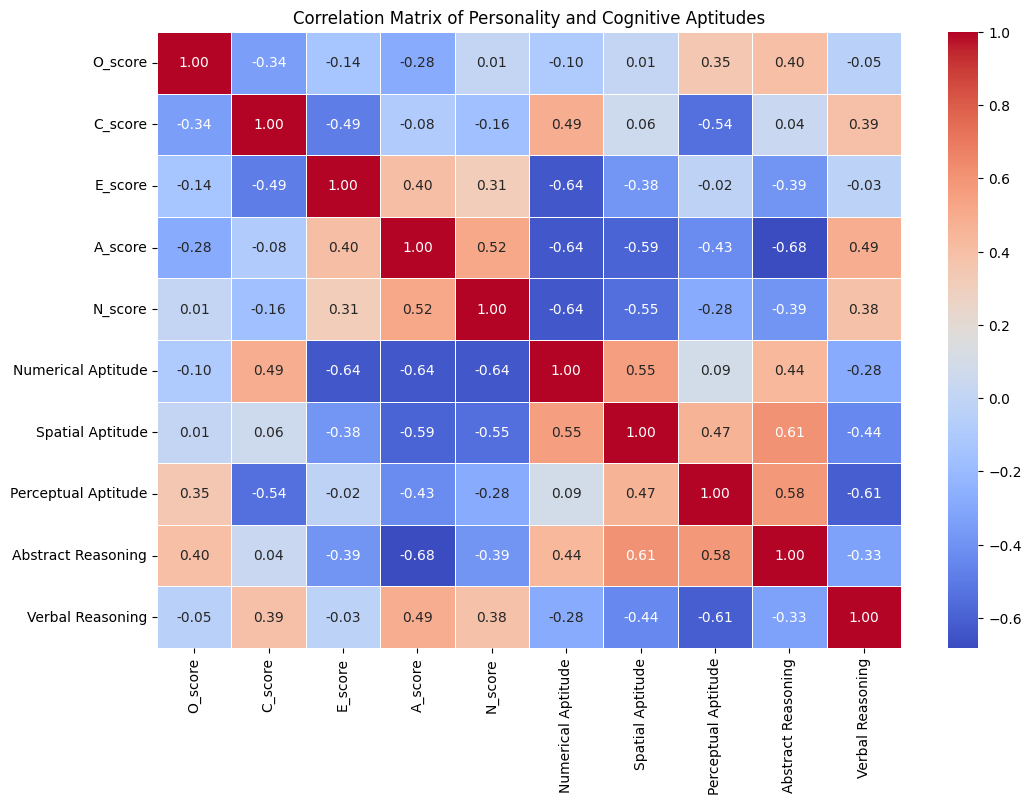

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the correlation matrix
correlation_matrix = data.drop(columns='Career').corr()

# Plotting the heatmap for the correlation matrix
plt.figure(figsize=(12, 8))
heatmap = sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix of Personality and Cognitive Aptitudes')
plt.show()

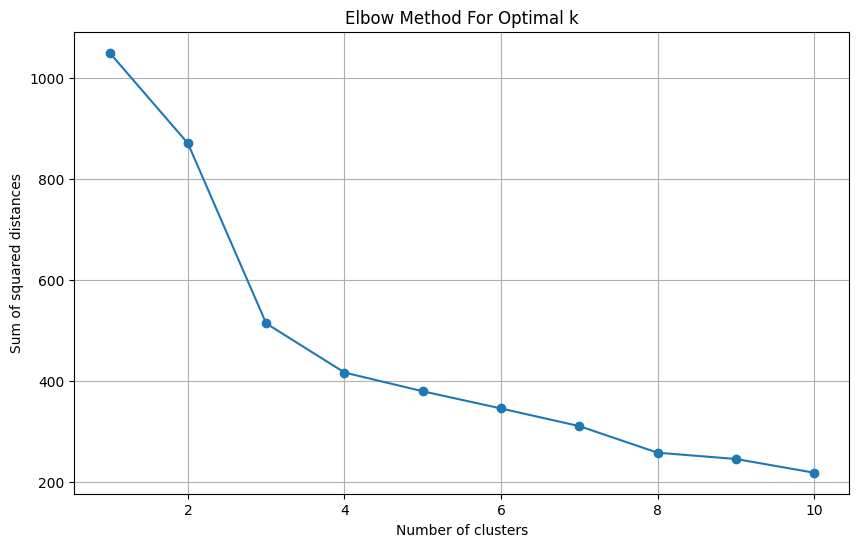

In [11]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import numpy as np

# Data preparation: scaling the data
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data.drop(columns='Career'))

# Elbow method to find the optimal number of clusters
sse = []  # Sum of squared errors
range_clusters = range(1, 11)  # Testing 1 to 10 clusters

for k in range_clusters:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(data_scaled)
    sse.append(kmeans.inertia_)

# Plotting the results of the elbow method
plt.figure(figsize=(10, 6))
plt.plot(range_clusters, sse, marker='o')
plt.title('Elbow Method For Optimal k')
plt.xlabel('Number of clusters')
plt.ylabel('Sum of squared distances')
plt.grid(True)
plt.show()

In [12]:
# Applying K-means clustering with both 3 and 4 clusters
kmeans_3 = KMeans(n_clusters=3, random_state=42)
kmeans_4 = KMeans(n_clusters=4, random_state=42)

# Fitting the model
clusters_3 = kmeans_3.fit_predict(data_scaled)
clusters_4 = kmeans_4.fit_predict(data_scaled)

# Adding the cluster labels to the dataframe
data['Cluster_3'] = clusters_3
data['Cluster_4'] = clusters_4

# Displaying a sample of the dataset with the cluster labels
data_sample = data[['O_score', 'C_score', 'E_score', 'A_score', 'N_score', 'Numerical Aptitude', 'Spatial Aptitude', 'Perceptual Aptitude', 'Abstract Reasoning', 'Verbal Reasoning', 'Career', 'Cluster_3', 'Cluster_4']].sample(10)
data_sample

,O_score,C_score,E_score,A_score,N_score,Numerical Aptitude,Spatial Aptitude,Perceptual Aptitude,Abstract Reasoning,Verbal Reasoning,Career,Cluster_3,Cluster_4
2,6.12,6.78,9.34,7.56,5.01,6.23,4.23,6.45,6.67,8.45,Salesperson,2,2
17,6.78,8.67,5.23,6.45,4.01,9.12,2.89,3.56,3.23,4.45,Financial Analyst,2,1
75,7.01,7.78,5.23,9.12,6.01,4.67,3.23,3.67,4.34,8.45,Occupational Therapist,2,2
21,9.12,7.45,4.23,5.67,3.78,7.01,6.45,6.78,8.78,6.01,Environmental Scientist,1,3
14,4.56,6.78,5.67,3.23,2.89,8.12,8.67,4.01,7.45,3.45,Construction Engineer,1,3
94,6.01,7.78,5.23,9.34,6.45,4.67,3.23,3.67,4.34,8.45,Rehabilitation Counselor,2,2
29,7.12,9.45,4.23,6.78,4.56,8.67,3.23,3.67,4.01,6.45,Pharmacist,2,1
62,6.01,7.78,5.23,9.34,6.45,4.67,3.23,3.67,4.34,8.45,Pediatric Nurse,2,2
23,6.34,8.12,2.89,6.78,4.78,7.45,3.23,3.56,4.23,7.01,IT Support Specialist,2,1
96,7.67,8.23,6.01,9.12,5.45,4.45,2.89,3.12,4.67,8.34,Diplomat,2,2


In [13]:
# Calculating the mean values of the features for each cluster in both 3-cluster and 4-cluster solutions
cluster_means_3 = data.drop(columns='Career').groupby('Cluster_3').mean()

cluster_means_3

,O_score,C_score,E_score,A_score,N_score,Numerical Aptitude,Spatial Aptitude,Perceptual Aptitude,Abstract Reasoning,Verbal Reasoning,Cluster_4
Cluster_3,,,,,,,,,,,
0,8.436667,4.326667,7.881111,7.141111,6.043333,3.522222,3.352222,8.426667,5.141111,4.414444,0.000000
1,7.804857,7.744000,4.323714,5.296000,4.820857,7.453714,6.514286,6.503143,7.976857,5.917143,2.942857
2,6.833770,7.894098,5.907869,7.722295,5.751639,5.427541,3.300984,3.913934,4.517705,7.648852,1.754098


In [14]:
cluster_means_4 = data.drop(columns='Career').groupby('Cluster_4').mean()
cluster_means_4

,O_score,C_score,E_score,A_score,N_score,Numerical Aptitude,Spatial Aptitude,Perceptual Aptitude,Abstract Reasoning,Verbal Reasoning,Cluster_3
Cluster_4,,,,,,,,,,,
0,8.436667,4.326667,7.881111,7.141111,6.043333,3.522222,3.352222,8.426667,5.141111,4.414444,0.0000
1,6.608125,8.546875,4.505625,6.388750,5.116875,8.276250,3.597500,4.010000,4.381875,6.881250,1.9375
2,6.858043,7.688696,6.371087,8.158478,5.965870,4.485435,3.309783,3.942826,4.578043,7.906739,2.0000
3,7.906765,7.710294,4.310294,5.262059,4.802353,7.447353,6.457353,6.495000,8.060882,5.878529,1.0000


In [15]:
a = data[data['Cluster_3'] == 0]['Career'].unique()
b = data[data['Cluster_3'] == 1]['Career'].unique()
c = data[data['Cluster_3'] == 2]['Career'].unique()

print('Cluster_3_1 \n' , a)
print('Cluster_3_2 \n' , b)
print('Cluster_3_3 \n' , c)

Cluster_3_1 
 ['Chef' 'Artist' 'Fashion Designer' 'Event Photographer' 'Musician'
 'Interior Designer' 'Video Game Tester' 'Fashion Stylist' 'Film Director']
Cluster_3_2 
 ['Accountant' 'Graphic Designer' 'Research Scientist' 'Architect'
 'Software Developer' 'Construction Engineer' 'Astronomer' 'Biologist'
 'Environmental Scientist' 'Biomedical Engineer' 'Biotechnologist'
 'Industrial Engineer' 'Zoologist' 'Mechanical Engineer'
 'Forensic Scientist' 'Geologist' 'Wildlife Biologist'
 'Air Traffic Controller' 'Game Developer' 'Urban Planner' 'Airline Pilot'
 'Environmental Engineer' 'Mechanical Designer' 'Aerospace Engineer'
 'Wildlife Conservationist' 'Biomedical Researcher' 'Electrical Engineer'
 'Marine Biologist' 'Forensic Psychologist' 'Public Health Analyst'
 'Quality Control Inspector' 'Civil Engineer' 'Robotics Engineer'
 'Electronics Design Engineer']
Cluster_3_3 
 ['Salesperson' 'Teacher' 'Nurse' 'Psychologist' 'Marketing Manager'
 'Physician' 'Human Resources Manager' 'Journa

In [16]:
a = data[data['Cluster_4'] == 0]['Career'].unique()
b = data[data['Cluster_4'] == 1]['Career'].unique()
c = data[data['Cluster_4'] == 2]['Career'].unique()
d = data[data['Cluster_4'] == 3]['Career'].unique()
print('Cluster_4_1 \n' , a)
print('Cluster_4_2 \n' , b)
print('Cluster_4_3 \n' , c)
print('Cluster_4_4 \n' , d)

Cluster_4_1 
 ['Chef' 'Artist' 'Fashion Designer' 'Event Photographer' 'Musician'
 'Interior Designer' 'Video Game Tester' 'Fashion Stylist' 'Film Director']
Cluster_4_2 
 ['Financial Analyst' 'IT Support Specialist' 'Data Analyst' 'Pharmacist'
 'Financial Planner' 'Software Quality Assurance Tester'
 'Financial Auditor' 'Financial Advisor' 'Airline Pilot'
 'Marketing Analyst' 'Database Administrator' 'Investment Banker'
 'Database Analyst' 'Insurance Underwriter' 'Tax Accountant'
 'Tax Collector']
Cluster_4_3 
 ['Salesperson' 'Teacher' 'Nurse' 'Psychologist' 'Marketing Manager'
 'Physician' 'Human Resources Manager' 'Journalist' 'Event Planner'
 'Real Estate Agent' 'Lawyer' 'Marketing Coordinator' 'Social Worker'
 'HR Recruiter' 'Elementary School Teacher' 'Market Research Analyst'
 'Police Detective' 'Marketing Copywriter' 'Speech Therapist'
 'Social Media Manager' 'Web Developer' 'Physical Therapist'
 'Dental Hygienist' 'Pediatric Nurse' 'Advertising Executive'
 'IT Project Manager'

In [36]:
knn_data = data.drop(columns='Cluster_3')
temp = knn_data.drop(columns = 'Career').groupby('Cluster_4').mean()
temp

knn_data.to_csv('knn_data.csv')
temp.to_csv('temp.csv')


In [34]:
from sklearn.metrics.pairwise import cosine_similarity

# Assuming `temp` is already created as:
# temp = knn_data.drop(columns='Career').groupby('Cluster_4').mean()

# --- Step 1: Create a new input sample as a Series ---
new_input = pd.Series({
    'O_score': 7.0,
    'C_score': 7.0,
    'E_score': 7.5,
    'A_score': 4.5,
    'N_score': 5.5,
    'Numerical Aptitude': 7.0,
    'Spatial Aptitude': 6.5,
    'Perceptual Aptitude': 6.0,
    'Abstract Reasoning': 5.0,
    'Verbal Reasoning': 5.0
})

# --- Step 2: Reshape input for cosine similarity ---
input_vector = new_input.values.reshape(1, -1)
centroid_vectors = temp.values

# --- Step 3: Compute cosine similarity ---
similarities = cosine_similarity(input_vector, centroid_vectors)

# --- Step 4: Get the index of the most similar cluster ---
closest_cluster = np.argmax(similarities)
closest_cluster

np.int64(3)